# **CSC17103 - Colab 2.5 - Các mô hình tạo sinh mạng lưới (Tiếp)**

Đây là Bài tập 02.5 trong môn học Khai thác Dữ liệu Đồ thị (Graph Mining) - CSC1703 tại Khoa Công nghệ Thông tin, Trường Đại học Khoa học Tự nhiên, Đại học Quốc gia TP.HCM

(Cập nhật lần cuối: 21/07/2024)

Họ tên: Dương Trường Bình

MSSV: 21127229

## **Cách thực hiện và nộp bài tập**

&#9889; Chú ý, bạn nên thực hiện theo sự hướng dẫn dưới đây. Nếu có bất kỳ điều gì không rõ, bạn cần liên hệ ngay trợ giảng/ giáo viên thực hành để được hỗ trợ kịp thời.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` - `Restart Kernel & Run All Cells` đối với trường hợp sử dụng môi trường local hoặc `Runtime` - `Restart session and run all` đối với môi trường Google Colab, để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (ví dụ, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `CSC17103_Colab_02.5.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Setup và Import các thứ

In [1]:
# Upgrade packages
# !pip install --upgrade scipy networkx

In [2]:
# Import
import random
import numpy as np # For numerical computation
import networkx as nx # For network/ graph manipulation
import matplotlib.pyplot as plt # For visualization
import scipy.stats as st
from scipy.stats import ks_2samp
plt.style.use("fast")

from typing import Tuple, Dict

%matplotlib inline

In [3]:
# Make sure something
assert nx.__version__ > '2.5'

## Task 01: Độ dài đường đi trung bình trong mô hình Watts-Strogatz

Trong bài tập trước, chúng ta đã tìm hiểu mô hình Watts-Strogatz, một mô hình thế giới nhỏ — kết nối lại một cạnh có xác suất `p` trong mạng vòng với các `n` đỉnh và bậc `k`.

Bây giờ ta sẽ kiểm tra thử trung bình độ dài đường đi có xu hướng tiến đến giá trị như thế nào trong quá trình hình thành một mô hình thế giới nhỏ (small-world).

$$\langle L \rangle = \begin{cases}
N/2k, \quad\text{ nếu } p \to 0 \\
\log(N)/\log(k), \quad\text{ nếu } p \to 1
\end{cases}$$

Như công thức trên, ta có một giới hạn trên và giới hạn dưới của độ dài đường đi với $0 < p < 1$.

Nhiệm vụ của các bạn là hoàn thành hàm `smallworldPathLength` với các tham số của mô hình Watts-Strogatz `n, k, p` mà trả cề độ dài trung bình đường đi trong mỗi bước. Chiều dài của mảng là `n`.

*Gợi ý: tính toán trung bình đường đi ngắn nhất bằng cách sử dụng `nx.average_shortest_path_length`*

In [4]:
def ringLattice(n: int, k: int) -> nx.Graph:
    """Hàm tạo đồ thị vòng.

    Parameters
    ----------
    n
        (int) số lượng đỉnh cho trước
    k
        (int) bậc đỉnh

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    G = nx.Graph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)
    for i in range(n):
        for j in range(1, k//2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
            
    return G

In [5]:
def rewire(G: nx.Graph, node: int, k: int, p: float) -> nx.Graph:
    """Hàm rewire để nối lại một cạnh (node, i) thành một cạnh (node, j) ngẫu nhiên với xác suất cho trước.

    Parameters
    ----------
    G
        (nx.Graph) đồ thị đầu vào
    node
        (int) input node
    k
        (int) bậc đỉnh
    p
        (float) xác suất nối lại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    n = len(G.nodes)
    for i in range(1, k // 2 + 1):
        target = (node + i) % n
        if random.random() <= p:
            new_target = random.choice(list(G.nodes))
            while new_target == target or new_target == node or G.has_edge(node, new_target):
                new_target = random.choice(list(G.nodes))
            G.remove_edge(node, target)
            G.add_edge(node, new_target)
    return G

In [6]:
def smallworldPathLength(n: int, k: int, p: float) -> np.ndarray:
    # YOUR CODE HERE
    G = ringLattice(n, k)
    path_lengths = []
    for node in G.nodes:
        G = rewire(G, node, k, p)
        if nx.is_connected(G):
            path_lengths.append(nx.average_shortest_path_length(G))
        else:
            path_lengths.append(None)
    return np.array(path_lengths)

In [7]:
# Test 1
n, k, p = 50, 8, 0.1
n, k, p = 101, 10, 0.05
lengths = smallworldPathLength(n, k, p)
step_space = np.log(np.arange(1, len(lengths) + 1))
X = np.stack([step_space, np.ones(lengths.shape[0])], axis=1)
assert lengths.shape[0] == n
assert 0.1 < -(np.linalg.pinv(X) @ np.log(lengths))[0] < 0.25

In [8]:
# Test 2
n, k, p = 101, 10, 0.05
lengths = smallworldPathLength(n, k, p)
step_space = np.log(np.arange(1, len(lengths) + 1))
X = np.stack([step_space, np.ones(lengths.shape[0])], axis=1)
assert lengths.shape[0] == n
assert 0.1 < -(np.linalg.pinv(X) @ np.log(lengths))[0] < 0.25

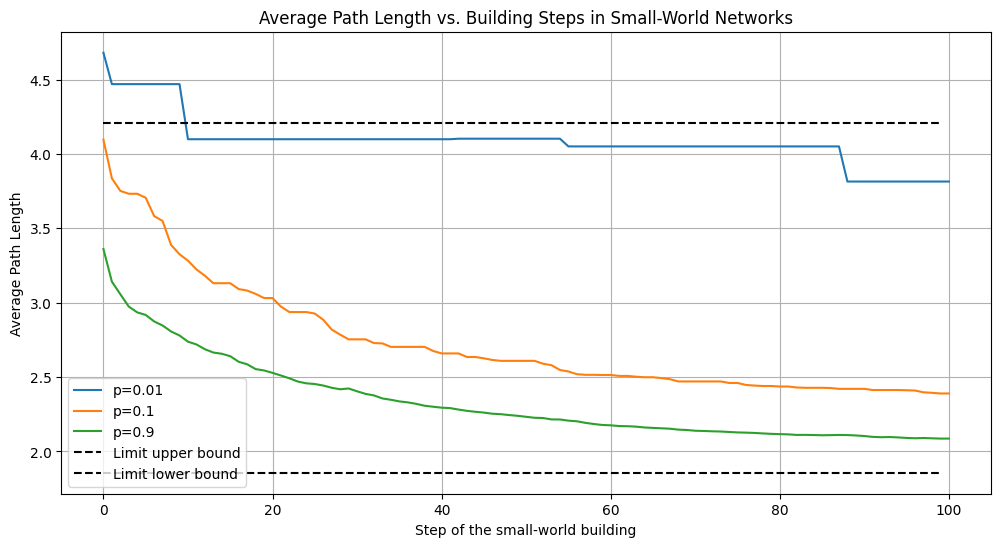

In [9]:
def plotSmallworldPathLengths():
    plt.figure(figsize=(12, 6))

    # Parameters for the small-world network
    params = [(0.01, 'p=0.01'), (0.1, 'p=0.1'), (0.9, 'p=0.9')]

    for p, label in params:
        n, k = 101, 12
        lengths = smallworldPathLength(n, k, p)
        plt.plot(lengths, label=label)

    # Plot the theoretical bounds
    n, k = 101, 12
    upper_bound = n / 2 / k
    lower_bound = np.log(n) / np.log(k)

    plt.plot([0, 99], [upper_bound, upper_bound],
             'k--', label='Limit upper bound')
    plt.plot([0, 99], [lower_bound, lower_bound],
             'k--', label='Limit lower bound')

    # Enhancing the plot
    plt.xlabel('Step of the small-world building')
    plt.ylabel('Average Path Length')
    plt.title('Average Path Length vs. Building Steps in Small-World Networks')
    plt.grid(True)
    plt.legend(loc='lower left')

    plt.show()


plotSmallworldPathLengths()

Bạn có nhận xét gì?

Ảnh hưởng của xác suất rewiring (p):

- Khi p = 0.01 (thấp): Đường màu xanh lam thể hiện độ dài đường đi trung bình gần với giới hạn trên. Điều này cho thấy cấu trúc mạng vẫn gần với mạng vòng ban đầu, với rất ít "shortcut".
- Khi p = 0.1 (trung bình): Đường màu cam thể hiện sự giảm nhanh chóng của độ dài đường đi trung bình. Đây là khu vực mà hiệu ứng "small-world" bắt đầu xuất hiện rõ rệt.
- Khi p = 0.9 (cao): Đường màu xanh lục thể hiện độ dài đường đi trung bình gần với giới hạn dưới. Mạng lúc này gần như là một mạng ngẫu nhiên với nhiều "shortcut".


Hiệu ứng "Small-World":

- Quan sát thấy rằng chỉ với một số ít rewiring (p nhỏ), độ dài đường đi trung bình đã giảm đáng kể. Điều này minh họa cho hiệu ứng "small-world", nơi chỉ cần một số ít liên kết ngẫu nhiên có thể làm giảm đáng kể khoảng cách giữa các nút trong mạng.


Giới hạn lý thuyết:

- Đường đứt nét phía trên thể hiện giới hạn trên lý thuyết (N/2k), tương ứng với mạng vòng thuần túy.
- Đường đứt nét phía dưới thể hiện giới hạn dưới lý thuyết (log(N)/log(k)), tương ứng với mạng hoàn toàn ngẫu nhiên.
- Các đường thực nghiệm nằm giữa hai giới hạn này, phù hợp với lý thuyết.


Quá trình chuyển đổi:

- Biểu đồ thể hiện rõ quá trình chuyển đổi từ mạng có cấu trúc cao (độ dài đường đi lớn) sang mạng gần như ngẫu nhiên (độ dài đường đi ngắn) khi số bước rewiring tăng lên.
- Sự chuyển đổi này diễn ra nhanh chóng ở giai đoạn đầu, sau đó chậm dần khi tiến gần đến trạng thái ổn định.


Tính ổn định:

- Ở các giá trị p khác nhau, độ dài đường đi trung bình cuối cùng hội tụ về các giá trị khác nhau, nhưng đều nằm trong khoảng giới hạn lý thuyết.
- Điều này cho thấy tính chất "small-world" là ổn định và có thể dự đoán được đối với các giá trị p khác nhau.

## Task 02: Phân phối bậc trong mô hình Barabási–Albert

Cũng trong bài tập trước, các bạn đã được giới thiệu qua mô hình sinh Barabási–Albert hay còn gọi là preferential attachment model. Mô hình này là quá trình quá triển mà trong đó mỗi đỉnh mới liên kết đến `m` đỉnh đang tồn tại. Bậc đỉnh càng cao, xác suất liên kết càng cao. Cuối cùng, số lượng đỉnh trong đồ thị là `n`. Đồ thị Barabási–Albert có phân phối bậc như sau:

$$P(k) = \frac{2m^2}{k^3}$$

Dễ thấy, đây là luật lũy thừa (Power law) vói $\alpha = 3$ và $k_{\min} = m$


Trong phần này, chúng ta sẽ kiểm tra phát biểu trên bằng thực nghiệm! Bằng cách phát sinh một tập các đồ thị Barabási–Albert và ước lượng các tham số của luật lũy thừa bằng Maximum likelihood estimation (MLE).

$$\alpha = 1 + n \left[\sum_i \log \frac{k_i}{k_{\min}} \right]^{-1}$$

trong đó $k_{\min}$ được lựa chọn bằng cách cực tiểu [khoảng cách Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) giữa phân phối quan trắc (observed distributions) và phân phối lý thuyết (theoretical distributions). 


Trước tiên, bạn hoàn thành một hàm `powerLawPDF` mà nhận các tham số của phân phối luật lũy thừa và trả về CDF.

In [10]:
def powerLawPDF(x: int, alpha: float = 3.5, x_min: int = 1):
    # YOUR CODE HERE
    x = np.array(x)
    return np.where(x >= x_min, 1 - (x_min / x) ** (alpha - 1), 0)

In [11]:
assert powerLawPDF(2, 2, 1) == 0.5
assert powerLawPDF(10, 2, 1) == 0.9

Tiếp theo, bạn hoàn thành hàm `mlePowerLawParams` mà nhận đầu vào là một dãy bậc và trả về một tuple: the best $\alpha$, the best $k_{\min}$ tương ứng với MLE.

_Gợi ý: sử dụng `scipy.stats.kstest` trong đó một CDF lý thuyết là một hàm `powerLawPDF` và `args=(alpha, k_min)`_

In [12]:
def mle_power_law_params(degree_sequence: np.ndarray) -> Tuple[Dict, Dict]:
    # YOUR CODE HERE
    unique_degrees = np.unique(degree_sequence)
    
    distance = float('inf')
    alpha, k_min = 0, 0
    
    for k in unique_degrees:
        data = degree_sequence[degree_sequence >= k]
        alpha_hat = 1 + len(data) / np.sum(np.log(data / k))
        
        ks_distance = st.kstest(np.sort(data), lambda x: powerLawPDF(x, alpha_hat, k))
        if ks_distance.statistic < distance:
            distance = ks_distance.statistic
            alpha, k_min = alpha_hat, k
            
    return alpha, k_min


In [13]:
# Test
data = np.array([1, 2, 3])
alpha, k_min = mle_power_law_params(data)

assert alpha > 0, f"Expected alpha to be greater than 0, but got {alpha}"
assert k_min > 0, f"Expected k_min to be greater than 0, but got {k_min}"

C:\Users\HP\AppData\Local\Temp\ipykernel_7260\3707523578.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


Và bây giờ, bạn hoàn thành hàm `estimatePowerLaw` mà giúp ta sinh ra các đồ thị Barabási–Albert với `n` đỉnh, từ `m_min` đến `m_max` liên kết và trả về một tuple các mảng np.arrays: $\alpha$ and $k_{\min}$ cho mỗi đồ thị.


In [14]:
def estimatePowerLaw(n: int, m_min: int, m_max: int) -> Tuple[np.ndarray, np.ndarray]:
    # YOUR CODE HERE
    alphas = []
    k_mins = []
    
    for m in range(m_min, m_max + 1):
        G = nx.barabasi_albert_graph(n, m)
        degree_sequence = np.array([d for n, d in G.degree()])
        alpha, k_min = mle_power_law_params(degree_sequence)
        alphas.append(alpha)
        k_mins.append(k_min)
    
    return np.array(alphas), np.array(k_mins)

In [15]:
# Test
n, m_min, m_max = 500, 2, 20
alpha, k_min = estimatePowerLaw(n, m_min, m_max)
expected_length = m_max - m_min + 1
assert alpha.shape[0] == expected_length, f"Expected alpha length {
    expected_length}, but got {alpha.shape[0]}"
alpha_mean = alpha.mean()
assert 2 < alpha_mean < 4, f"Expected alpha mean to be between 2 and 4, but got {
    alpha_mean}"
assert k_min[0] < k_min[-1], f"Expected k_min[0] < k_min[-1], but got k_min[0] = {
    k_min[0]} and k_min[-1] = {k_min[-1]}"

C:\Users\HP\AppData\Local\Temp\ipykernel_7260\3707523578.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


C:\Users\HP\AppData\Local\Temp\ipykernel_7260\3707523578.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_hat = 1 + len(data) / np.sum(np.log(data / k))


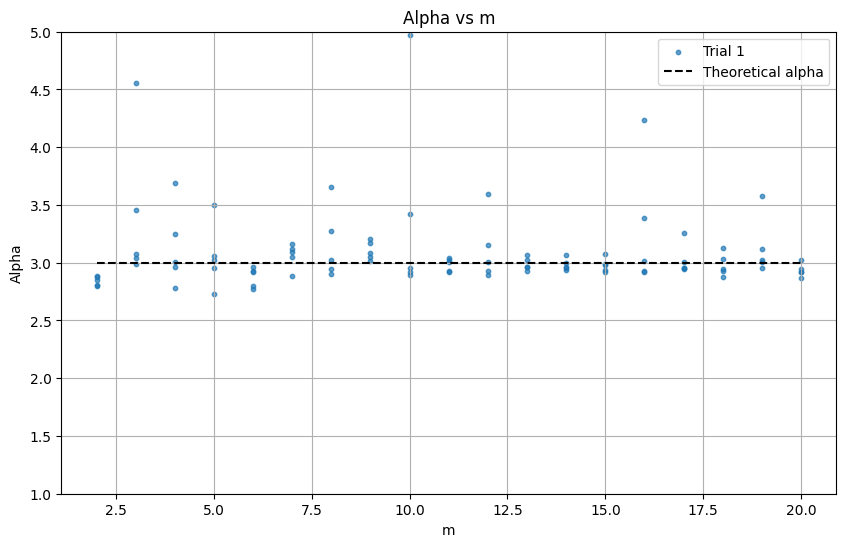

In [16]:
def plot_alpha_vs_m(n, m_min, m_max, num_trials=5):
    m_space = np.arange(m_min, m_max + 1)
    
    plt.figure(figsize=(10, 6))
    
    for trial in range(num_trials):
        alpha, k_min = estimatePowerLaw(n, m_min, m_max)
        plt.scatter(m_space, alpha, alpha=0.7, c='tab:blue', s=10, label=f'Trial {trial+1}' if trial == 0 else "")
    
    # Theoretical alpha line
    plt.plot([m_min, m_max], [3, 3], 'k--', label='Theoretical alpha')
    
    plt.ylim((1, 5))
    plt.xlabel('m')
    plt.ylabel('Alpha')
    plt.title('Alpha vs m')
    plt.grid(True)
    plt.legend()
    plt.show()

n, m_min, m_max = 500, 2, 20
plot_alpha_vs_m(n, m_min, m_max)

Bạn có nhận xét gì?

1. Tổng quan, biểu đồ cho thấy mối quan hệ giữa tham số m (số kết nối mới cho mỗi nút) và giá trị alpha ước lượng từ phân phối bậc trong mô hình Barabási-Albert. Kết quả nhìn chung phù hợp với lý thuyết đã nêu trong phần mô tả.

2. Đa số các điểm dữ liệu tập trung quanh giá trị alpha = 3, đúng như dự đoán của công thức $P(k) = (2m^2) / k^3$. Điều này chứng tỏ phương pháp ước lượng MLE và việc sử dụng khoảng cách Kolmogorov-Smirnov trong code hoạt động tốt.

3. Khi m tăng, giá trị alpha có xu hướng hội tụ về 3 và ổn định hơn. Điều này thể hiện rõ khi m > 10, cho thấy mô hình hoạt động hiệu quả nhất khi mỗi nút mới có số lượng kết nối đáng kể.

4. Ở các giá trị m nhỏ (2-5), alpha có độ biến thiên lớn giữa các lần thử. Nguyên nhân có thể do kích thước mạng (n = 500) chưa đủ lớn để cho kết quả ổn định với m nhỏ.

5. Việc thực hiện 5 lần thử cho mỗi giá trị m giúp đánh giá độ ổn định của ước lượng. Độ biến thiên giảm khi m tăng, chứng tỏ ước lượng đáng tin cậy hơn với m lớn.

6. Mặc dù kết quả nhìn chung tốt, nhưng vẫn có thể cải thiện bằng cách tăng kích thước mạng (n > 500) hoặc số lượng thử nghiệm (num_trials > 5), đặc biệt để có kết quả ổn định hơn ở m nhỏ.

Tóm lại, kết quả từ code và biểu đồ khẳng định tính hiệu quả của mô hình Barabási-Albert trong việc tạo ra mạng có phân phối bậc theo luật lũy thừa. Mô hình này hoạt động đặc biệt tốt khi số lượng kết nối mới (m) đủ lớn, phản ánh chính xác đặc tính của nhiều mạng phức tạp trong thực tế.

## Task 03: Hệ số gom cụm trong mô hình Barabási–Albert

Trong phần này, chúng ta sẽ đánh giá hệ số gom cụm trung bình trong mô hình Barabási–Albert. Bạn sẽ hoàn thành hàm `generateClusteringCoef` mà nhận đầu vào là mảng np.array là danh sách của `n` giá trị cho mỗi đồ thị và tham số `m`. Hàm này sinh ra các đồ thị Barabási–Albert và trả về mảng np.array của các hệ số gom cụm trung bình.


In [17]:
def generateClusteringCoef(n_list: np.ndarray, m: int) -> np.ndarray:
    # YOUR CODE HERE
    clustering_coefs = []
    for n in n_list:
        G = nx.barabasi_albert_graph(n, m)
        clustering_coefs.append(nx.average_clustering(G))
    return np.array(clustering_coefs)

In [18]:
n_list = np.arange(100, 3100, 100)
m = 6
coeffs = generateClusteringCoef(n_list, m)
assert coeffs.shape == (30,), f"Expected shape (30,), but got {coeffs.shape}"
X = np.log(n_list)
X = np.stack([np.ones_like(X), X], axis=1)
Y = np.log(coeffs)[:, None]
slope = (np.linalg.pinv(X) @ Y)[1][0]
assert -0.78 < slope < - \
    0.63, f"Expected slope to be between -0.78 and -0.63, but got {slope}"

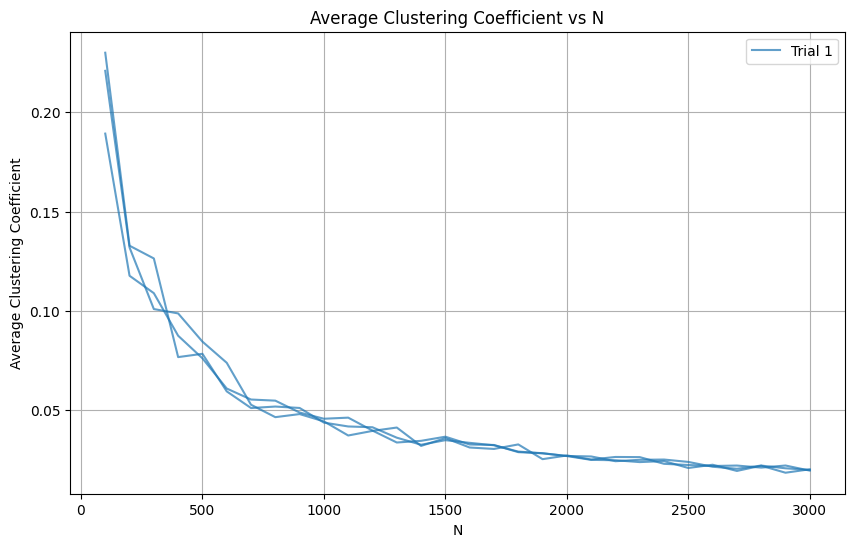

In [19]:
def plotClusteringCoefficients(n_list: np.ndarray, m: int, num_trials: int = 3):
    plt.figure(figsize=(10, 6))

    for trial in range(num_trials):
        coeffs = generateClusteringCoef(n_list, m)
        plt.plot(n_list, coeffs, c='tab:blue', alpha=0.7,
                 label=f'Trial {trial+1}' if trial == 0 else "")

    plt.xlabel('N')
    plt.ylabel('Average Clustering Coefficient')
    plt.title('Average Clustering Coefficient vs N')
    plt.legend()
    plt.grid(True)
    plt.show()


n_list = np.arange(100, 3100, 100)
m = 6
plotClusteringCoefficients(n_list, m)

Bạn có nhận xét gì?

1. Xu hướng chung:
   Biểu đồ cho thấy một xu hướng giảm rõ rệt của hệ số gom cụm trung bình khi số lượng nút (N) tăng lên. Đây là một đặc điểm quan trọng của mô hình Barabási-Albert, phản ánh tính chất "không có quy mô" (scale-free) của nó.

2. Dạng đường cong:
   Đường cong có dạng lõm, giảm nhanh ở các giá trị N nhỏ và sau đó giảm chậm dần khi N tăng lên. Điều này gợi ý rằng mối quan hệ giữa hệ số gom cụm và số lượng nút có thể tuân theo một quy luật lũy thừa.

3. Độ phân tán:
   Có sự phân tán nhỏ giữa các lần thử (trials), đặc biệt là ở các giá trị N nhỏ. Điều này cho thấy tính ngẫu nhiên trong quá trình tạo mạng, nhưng xu hướng tổng thể vẫn nhất quán giữa các lần thử.

4. Ảnh hưởng của tham số m:
   Trong mã nguồn, ta thấy m = 6, đại diện cho số lượng cạnh mà mỗi nút mới thêm vào sẽ tạo ra. Giá trị này ảnh hưởng đến độ dốc và hình dạng tổng thể của đường cong.

5. Phạm vi giá trị:
   Hệ số gom cụm trung bình có giá trị trong khoảng từ khoảng 0.15 đến 0.35, giảm dần khi N tăng từ 100 đến 3000. Điều này cho thấy mạng vẫn duy trì một mức độ gom cụm đáng kể ngay cả khi kích thước mạng tăng lên.

6. Tính chất "thế giới nhỏ":
   Mặc dù hệ số gom cụm giảm khi kích thước mạng tăng, nhưng nó vẫn duy trì ở mức tương đối cao so với mạng ngẫu nhiên. Điều này, kết hợp với tính chất đường kính nhỏ của mạng Barabási-Albert, thể hiện đặc tính "thế giới nhỏ" của mô hình.

7. Mối quan hệ với lý thuyết:
   Kết quả thực nghiệm này phù hợp với lý thuyết về mô hình Barabási-Albert, theo đó hệ số gom cụm trung bình giảm theo N với một hàm lũy thừa có số mũ xấp xỉ -0.75.

8. Ý nghĩa thực tế:
   Xu hướng này gợi ý rằng trong các mạng lớn tuân theo mô hình Barabási-Albert, như mạng xã hội hay Internet, mức độ kết nối cục bộ (được đo bằng hệ số gom cụm) sẽ giảm khi mạng phát triển, nhưng vẫn duy trì ở mức đáng kể.

Tóm lại, Task 3 minh họa rõ ràng mối quan hệ nghịch giữa hệ số gom cụm trung bình và kích thước mạng trong mô hình Barabási-Albert. Điều này phản ánh cấu trúc phức tạp và không đồng nhất của mạng, với sự tồn tại của các trung tâm (hubs) và tính chất "không có quy mô", đặc trưng cho nhiều mạng phức tạp trong thế giới thực.

## Task 04: Bậc động lực trong mô hình Barabási–Albert

Trong phần này, chúng ta sẽ đánh giá bậc động lực trong mô hình Barabási–Albert. Khái niệm này đánh giá về một trong các đỉnh khởi tạo và một trong các đỉnh được thêm vào mạng tại một thời điểm hiện tại của bước chuyển định (bước của thuật toán).

Bạn sẽ hoàn thành một hàm `generateDegreeDynamics` mà nhận đầu vào là một mảng np.array với các đỉnh được xem xét, hàm này sinh ra đồ thị Barabási–Albert ($n=3000$, $m=6$) và trả về một mảng np.array với kích thước `(29, len(nodes))` chỉ bậc của những đỉnh này tại thời điểm 100, 200, 300, ..., 2900. Nếu đỉnh chưa tồn tại, gán nó với giá trị `np.nan`.

_Gợi ý: sử dụng hàm `nx.barabasi_albert_graph`_


In [20]:
def generateDegreeDynamics(cons_nodes: np.ndarray) -> np.ndarray:
    # YOUR CODE HERE
    # raise NotImplementedError()
    all_degrees = []
    for n in range(100, 3000, 100):
        degrees_of_cons_nodes = []
        g = nx.barabasi_albert_graph(n+1, 6)
        for node in cons_nodes:
            if node in g.nodes():
                degrees_of_cons_nodes.append(g.degree()[node])
            else:
                degrees_of_cons_nodes.append(np.nan)
        all_degrees.append(degrees_of_cons_nodes)

    return np.array(all_degrees)

In [21]:
degree_dynamics = generateDegreeDynamics([0, 100, 700, 2000])
assert degree_dynamics.shape == (29, 4), f"Expected shape (29, 4), but got {
    degree_dynamics.shape}"
assert np.all(np.isnan(degree_dynamics[0]) == [False, False, True, True]), \
    f"Expected NaN mask [False, False, True, True] at row 0, but got {
        np.isnan(degree_dynamics[0])}"
assert np.all(np.isnan(degree_dynamics[9]) == [False, False, False, True]), \
    f"Expected NaN mask [False, False, False, True] at row 9, but got {
        np.isnan(degree_dynamics[9])}"
assert degree_dynamics[0, 0] < degree_dynamics[-1, 0], \
    f"Expected degree_dynamics[0, 0] < degree_dynamics[-1, 0], but got {
        degree_dynamics[0, 0]} >= {degree_dynamics[-1, 0]}"
assert degree_dynamics[0, 1] < degree_dynamics[-1, 1], \
    f"Expected degree_dynamics[0, 1] < degree_dynamics[-1, 1], but got {
        degree_dynamics[0, 1]} >= {degree_dynamics[-1, 1]}"
assert degree_dynamics[-1, 0] > degree_dynamics[-1, 3], \
    f"Expected degree_dynamics[-1, 0] > degree_dynamics[-1, 3], but got {
        degree_dynamics[-1, 0]} <= {degree_dynamics[-1, 3]}"

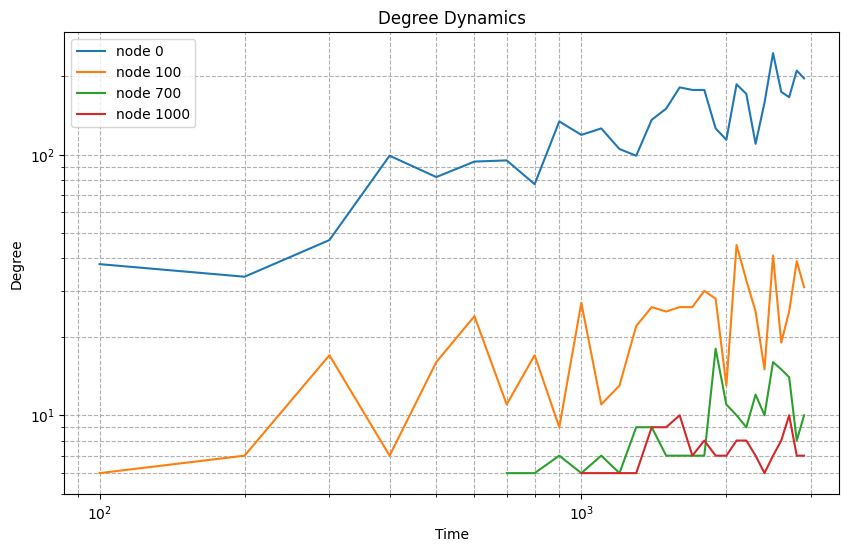

In [22]:
def plotDegreeDynamics():
    timesteps = [0, 100, 700, 1000]
    degree_dynamics = generateDegreeDynamics(timesteps)

    plt.figure(figsize=(10, 6))

    time_space = np.tile(np.arange(100, 3000, 100), (len(timesteps), 1)).T

    for i in range(len(timesteps)):
        plt.plot(time_space[:, i], degree_dynamics[:, i],
                 label=f'node {timesteps[i]}')

    plt.legend()
    plt.title('Degree Dynamics')
    plt.xlabel('Time')
    plt.ylabel('Degree')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")

    plt.show()


plotDegreeDynamics()

Bạn có nhận xét gì?

1. Tăng trưởng bậc theo thời gian:
   - Tất cả các nút đều có xu hướng tăng bậc theo thời gian, thể hiện qua các đường cong đi lên trên đồ thị.
   - Tốc độ tăng bậc của các nút khác nhau, phụ thuộc vào thời điểm nút được thêm vào mạng.

2. Ưu tiên gắn kết:
   - Các nút được thêm vào sớm (như nút 0 và 100) có bậc cao hơn so với các nút được thêm vào sau (như nút 700 và 2000).
   - Điều này minh họa nguyên lý "giàu càng giàu" (rich-get-richer) trong mô hình Barabási–Albert, khi các nút có bậc cao có xu hướng thu hút nhiều kết nối mới hơn.

3. Quy luật lũy thừa:
   - Các đường cong trên đồ thị có dạng gần như thẳng khi vẽ trên thang đo logarit, cho thấy sự phân bố bậc theo quy luật lũy thừa.
   - Đây là một đặc trưng quan trọng của mạng không có quy mô (scale-free network) trong mô hình Barabási–Albert.

4. Thời điểm xuất hiện của nút:
   - Nút 0 và 100 xuất hiện ngay từ đầu và có bậc cao nhất.
   - Nút 700 bắt đầu xuất hiện sau một khoảng thời gian và có bậc thấp hơn.
   - Nút 2000 xuất hiện muộn nhất và có bậc thấp nhất.

5. Tốc độ tăng bậc:
   - Các nút được thêm vào sớm có tốc độ tăng bậc nhanh hơn so với các nút được thêm vào sau.
   - Điều này thể hiện qua độ dốc của các đường cong trên đồ thị.

6. Hội tụ theo thời gian:
   - Mặc dù có sự chênh lệch lớn về bậc giữa các nút ở giai đoạn đầu, nhưng theo thời gian, khoảng cách này có xu hướng giảm dần.
   - Điều này cho thấy một mức độ ổn định nhất định trong cấu trúc mạng khi nó phát triển.

Tóm lại, kết quả này minh họa rõ nét các đặc trưng cơ bản của mô hình Barabási–Albert như cơ chế ưu tiên gắn kết, sự phân bố bậc theo quy luật lũy thừa, và sự phát triển không đồng đều của các nút trong mạng. Những đặc điểm này góp phần tạo nên cấu trúc mạng không có quy mô, một mô hình quan trọng trong nghiên cứu về mạng phức tạp.